In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

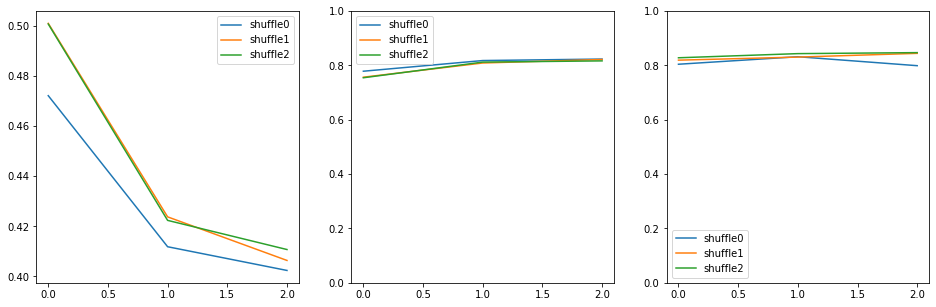

In [40]:
run_dir = Path("runs/test/run7")

plt.figure(figsize=(16, 5))
gs = plt.GridSpec(1, 3)
for shuffle in sorted(run_dir.glob('shuffle*/')):
    if not (shuffle / 'train.csv').exists():
        continue
    
    ax = plt.subplot(gs[0])
    df = pd.read_csv(shuffle / 'train.csv')
    plt.plot(df.epoch, df.loss, label=shuffle.parts[-1])
    plt.legend()
    
    ax = plt.subplot(gs[1])
    df = pd.read_csv(shuffle / 'train.csv')
    plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
    plt.ylim(0, 1)
    plt.legend()
    
    ax = plt.subplot(gs[2])
    df = pd.read_csv(shuffle / 'val.csv')
    plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
    plt.ylim(0, 1)
    plt.legend()